# Data Wrangling

In this notebook, we perform data cleaning, fix missing values, and add new columns with meaning values.

## Loading modules

In [1]:
import pandas as pd
import numpy as np
#To find the file encoding type
import chardet
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#display configuration

#from IPython.core.display import HTML
#css = open('../style-table.css').read() + open('../style-notebook.css').read()
#HTML('<style>{}</style>'.format(css))

## Importing, loading, and cleaning the data

### Test data
We acquired the test score data for the [California Assessment of Student Performance and Progress (CAASPP)](https://caaspp.cde.ca.gov/). The data is available between 2015 and 2018.

* [CAASPP test scores](https://caaspp.cde.ca.gov/sb2018/ResearchFileList) 

#### Test data
We first load the 2018 test data.

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
missing_values = ['n/a', 'na', '-', '*']

In [5]:
df = pd.read_csv("../../Data/sb_ca2018_all_csv_v3/sb_ca2018_all.csv", na_values = missing_values, 
                 dtype={'Percentage Standard Exceeded': np.float64,
                        'Percentage Standard Met': np.float64,
                        'Percentage Standard Met and Above': np.float64,
                        'Percentage Standard Nearly Met': np.float64,
                        'Percentage Standard Not Met': np.float64,
                        'Area 1 Percentage Above Standard': np.float64,
                        'Area 1 Percentage Near Standard': np.float64,
                        'Area 1 Percentage Below Standard': np.float64,
                        'Area 2 Percentage Above Standard': np.float64,
                        'Area 2 Percentage Near Standard': np.float64,
                        'Area 2 Percentage Below Standard': np.float64,
                        'Area 3 Percentage Above Standard': np.float64,
                        'Area 3 Percentage Near Standard': np.float64,
                        'Area 3 Percentage Below Standard': np.float64,
                        'Area 4 Percentage Above Standard': np.float64,
                        'Area 4 Percentage Near Standard': np.float64,
                        'Area 4 Percentage Below Standard': np.float64})

In [6]:
df.shape

(3269730, 32)

In [7]:
df.head()

,County Code,District Code,School Code,Filler,Test Year,Subgroup ID,Test Type,Total Tested At Entity Level,Total Tested with Scores,Grade,Test Id,CAASPP Reported Enrollment,Students Tested,Mean Scale Score,Percentage Standard Exceeded,Percentage Standard Met,Percentage Standard Met and Above,Percentage Standard Nearly Met,Percentage Standard Not Met,Students with Scores,Area 1 Percentage Above Standard,Area 1 Percentage Near Standard,Area 1 Percentage Below Standard,Area 2 Percentage Above Standard,Area 2 Percentage Near Standard,Area 2 Percentage Below Standard,Area 3 Percentage Above Standard,Area 3 Percentage Near Standard,Area 3 Percentage Below Standard,Area 4 Percentage Above Standard,Area 4 Percentage Near Standard,Area 4 Percentage Below Standard
0,0,0,0,NaN,2018,1,B,3180554.0,3177403.0,3,1,445017.0,434454.0,2424.0,26.13,22.09,48.22,23.49,28.29,434193.0,25.32,44.02,30.66,23.84,43.30,32.85,20.89,61.25,17.86,27.60,47.71,24.68
1,0,0,0,NaN,2018,1,B,3187375.0,3184687.0,3,2,445018.0,436464.0,2430.9,21.07,27.82,48.89,23.56,27.55,436215.0,33.59,33.20,33.21,26.72,42.30,30.98,28.80,46.31,24.89,0.00,0.00,0.00
2,0,0,0,NaN,2018,1,B,3187375.0,3184687.0,4,2,463838.0,455589.0,2467.7,18.46,24.45,42.92,30.81,26.27,455315.0,29.03,31.02,39.95,21.65,44.73,33.62,24.03,43.78,32.20,0.00,0.00,0.00
3,0,0,0,NaN,2018,1,B,3180554.0,3177403.0,4,1,463838.0,453771.0,2463.7,26.31,22.36,48.67,19.25,32.08,453491.0,24.77,46.77,28.46,24.18,44.21,31.61,19.30,63.22,17.48,25.86,48.83,25.31
4,0,0,0,NaN,2018,1,B,3180554.0,3177403.0,5,1,469247.0,459433.0,2496.3,21.80,27.63,49.43,19.99,30.58,459208.0,24.22,45.02,30.76,29.20,41.42,29.38,16.52,59.74,23.73,28.29,44.32,27.39


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3269730 entries, 0 to 3269729
Data columns (total 32 columns):
County Code                          int64
District Code                        int64
School Code                          int64
Filler                               float64
Test Year                            int64
Subgroup ID                          int64
Test Type                            object
Total Tested At Entity Level         float64
Total Tested with Scores             float64
Grade                                int64
Test Id                              int64
CAASPP Reported Enrollment           float64
Students Tested                      float64
Mean Scale Score                     float64
Percentage Standard Exceeded         float64
Percentage Standard Met              float64
Percentage Standard Met and Above    float64
Percentage Standard Nearly Met       float64
Percentage Standard Not Met          float64
Students with Scores                 float64
Ar

#### Entity tables
The following entity files list the County, District, and School entity names and codes for all entities as the existed in the administration year selected. This file must be merged with the test data file to join these entity names with the appropriate score data.

In [9]:
#find the file encoding type
#with open("../../Data/sb_ca2018_all_csv_v3/sb_ca2018entities.csv", 'rb') as f:
#    result = chardet.detect(f.read())  # or readline if the file is large
    
result = {'encoding': 'Windows-1252', 'confidence': 0.7299741290274674, 'language': ''}

In [10]:
entities = pd.read_csv("../../Data/sb_ca2018_all_csv_v3/sb_ca2018entities.csv", encoding=result['encoding'], na_values = missing_values)

In [11]:
entities.shape

(11333, 10)

In [12]:
entities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11333 entries, 0 to 11332
Data columns (total 10 columns):
County Code      11333 non-null int64
District Code    11333 non-null int64
School Code      11333 non-null int64
Filler           0 non-null float64
Test Year        11333 non-null int64
Type Id          11333 non-null int64
County Name      11333 non-null object
District Name    11274 non-null object
School Name      10251 non-null object
Zip Code         11333 non-null object
dtypes: float64(1), int64(5), object(4)
memory usage: 885.5+ KB


In [13]:
entities.drop(columns='Filler', inplace=True)

The `Zip Code` is type string. For further merging cases, we change the `Zip Code` to the integer type to maintain the same type.

In [14]:
#tip: we need same data types of keywords for merging

#missing values

#convert 'Zip Code' column type: string to int64
entities['Zip Code'] = pd.to_numeric(entities['Zip Code'], errors='coerce').fillna(0).astype(np.int64)

In [15]:
entities.head()

,County Code,District Code,School Code,Test Year,Type Id,County Name,District Name,School Name,Zip Code
0,35,67520,6035109,2018,7,San Benito,Panoche Elementary,Panoche Elementary,95043
1,35,67538,0,2018,6,San Benito,San Benito High,NaN,0
2,35,67538,3530029,2018,7,San Benito,San Benito High,San Andreas Continuation High,95023
3,35,67538,3537008,2018,7,San Benito,San Benito High,San Benito High,95023
4,35,67553,0,2018,6,San Benito,Southside Elementary,NaN,0


#### Subgroup and Test ID tables
Each [`Subgroup ID`](https://caaspp.cde.ca.gov/sb2018/research_fixfileformat18) has the following meanings. We can investigate the characteristics of individual students. 

In [16]:
subgroup = pd.read_csv("../../Data/Subgroups.txt", header=None, na_values = missing_values)
subgroup.shape

(47, 4)

In [17]:
subgroup.head()

,0,1,2,3
0,1,1,"""All Students""","""All Students"""
1,3,3,"""Male""","""Gender"""
2,4,4,"""Female""","""Gender"""
3,6,6,"""Fluent English proficient and English only""","""English-Language Fluency"""
4,7,7,"""Initial fluent English proficient (IFEP)""","""English-Language Fluency"""


We clean the `Subgroup ID` table. The first and the second columns are redundant, so the first one is dropped. We name the columns. 

The category "English-Language Fluency" has the 8 student groups:
* Fluent English proficient and English only
* Initial fluent English proficient (IFEP)
* Reclassified fluent English proficient (RFEP)
* English learners (ELs) enrolled in school in the U.S. fewer than 12 months
* English learners enrolled in school in the U.S. 12 months or more
* English learner
* Ever-ELs
* English only

Those groups are related as follows:
* Total students = Fluent English proficient and English only + English learner
* Fluent English proficient and English only = Initial fluent English proficient (IFEP) + Reclassified fluent English proficient (RFEP) + English only
* English learner = English learners (ELs) enrolled in school in the U.S. fewer than 12 months + English learners enrolled in school in the U.S. 12 months or more
* Ever-ELs = Reclassified fluent English proficient (RFEP) + English learner

The definition of **Initial fluent English proficient (IFEP)** is as follows:
On the first ever taken California English Language Development Test (CELDT), if your child scored at the Early Advanced or Advanced level of language proficiency, your child is identified as "Initially Fluent English Proficient" or IFEP, meaning that your child has enough language proficiency to continue learning like native language speaking and doesn’t need additional English Language Development support.

In [18]:
#delete first column (redundant with the second column); axis = 0 (index) and axis =1 (column), inplace=True means adjusting
subgroup.drop(0, axis=1, inplace=True)
subgroup.columns = ['Subgroup ID', 'Student Groups', 'Category']
subgroup.sort_values("Category")
subgroup

,Subgroup ID,Student Groups,Category
0,1,"""All Students""","""All Students"""
1,3,"""Male""","""Gender"""
2,4,"""Female""","""Gender"""
3,6,"""Fluent English proficient and English only""","""English-Language Fluency"""
4,7,"""Initial fluent English proficient (IFEP)""","""English-Language Fluency"""
5,8,"""Reclassified fluent English proficient (RFEP)""","""English-Language Fluency"""
6,28,"""Migrant education""","""Migrant"""
7,31,"""Economically disadvantaged""","""Economic Status"""
8,74,"""Black or African American""","""Ethnicity"""
9,75,"""American Indian or Alaska Native""","""Ethnicity"""


In [19]:
subgroup['Category'] = subgroup['Category'].map(lambda x: x.replace('"', '').strip())
subgroup['Student Groups'] = subgroup['Student Groups'].map(lambda x: x.replace('"', '').strip())
subgroup

,Subgroup ID,Student Groups,Category
0,1,All Students,All Students
1,3,Male,Gender
2,4,Female,Gender
3,6,Fluent English proficient and English only,English-Language Fluency
4,7,Initial fluent English proficient (IFEP),English-Language Fluency
5,8,Reclassified fluent English proficient (RFEP),English-Language Fluency
6,28,Migrant education,Migrant
7,31,Economically disadvantaged,Economic Status
8,74,Black or African American,Ethnicity
9,75,American Indian or Alaska Native,Ethnicity


The `Test ID` has the following meanings. The `Test ID` is 1-4; 1 represents ELA and 2 represents mathematics, respectively. We do not consider 3 and 4 because they are CAA (California Alternative Assessments) scores. The CAA scores are taken by students in grades 3–8 and grade 11 whose individualized education program (IEP) teams have determined that the student's cognitive disabilities prevent him or her from taking the online CAASPP Smarter Balanced assessments.

In [20]:
tests_id = pd.read_csv("../../Data/Tests.txt", header=None, na_values = missing_values)
tests_id

,0,1,2
0,Test ID,Test ID Num,Test Name
1,1,1,SB - English Language Arts/Literacy
2,2,2,SB - Mathematics
3,3,3,CAA - English Language Arts/Literacy
4,4,4,CAA - Mathematics


For readability, we convert the **column type** of `Test Id` from `int64` to `string`.

In [21]:
#convert 'Test Id' column type: int64 to string
df['Test Id'] = df['Test Id'].replace(1, "English")
df['Test Id'] = df['Test Id'].replace(2, "Mathematics")
df['Test Id'] = df['Test Id'].replace(3, "CAA-English")
df['Test Id'] = df['Test Id'].replace(4, "CAA-Mathematics")
df

,County Code,District Code,School Code,Filler,Test Year,Subgroup ID,Test Type,Total Tested At Entity Level,Total Tested with Scores,Grade,Test Id,CAASPP Reported Enrollment,Students Tested,Mean Scale Score,Percentage Standard Exceeded,Percentage Standard Met,Percentage Standard Met and Above,Percentage Standard Nearly Met,Percentage Standard Not Met,Students with Scores,Area 1 Percentage Above Standard,Area 1 Percentage Near Standard,Area 1 Percentage Below Standard,Area 2 Percentage Above Standard,Area 2 Percentage Near Standard,Area 2 Percentage Below Standard,Area 3 Percentage Above Standard,Area 3 Percentage Near Standard,Area 3 Percentage Below Standard,Area 4 Percentage Above Standard,Area 4 Percentage Near Standard,Area 4 Percentage Below Standard
0,0,0,0,NaN,2018,1,B,3180554.0,3177403.0,3,English,445017.0,434454.0,2424.0,26.13,22.09,48.22,23.49,28.29,434193.0,25.32,44.02,30.66,23.84,43.30,32.85,20.89,61.25,17.86,27.60,47.71,24.68
1,0,0,0,NaN,2018,1,B,3187375.0,3184687.0,3,Mathematics,445018.0,436464.0,2430.9,21.07,27.82,48.89,23.56,27.55,436215.0,33.59,33.20,33.21,26.72,42.30,30.98,28.80,46.31,24.89,0.00,0.00,0.00
2,0,0,0,NaN,2018,1,B,3187375.0,3184687.0,4,Mathematics,463838.0,455589.0,2467.7,18.46,24.45,42.92,30.81,26.27,455315.0,29.03,31.02,39.95,21.65,44.73,33.62,24.03,43.78,32.20,0.00,0.00,0.00
3,0,0,0,NaN,2018,1,B,3180554.0,3177403.0,4,English,463838.0,453771.0,2463.7,26.31,22.36,48.67,19.25,32.08,453491.0,24.77,46.77,28.46,24.18,44.21,31.61,19.30,63.22,17.48,25.86,48.83,25.31
4,0,0,0,NaN,2018,1,B,3180554.0,3177403.0,5,English,469247.0,459433.0,2496.3,21.80,27.63,49.43,19.99,30.58,459208.0,24.22,45.02,30.76,29.20,41.42,29.38,16.52,59.74,23.73,28.29,44.32,27.39
5,0,0,0,NaN,2018,1,B,3187375.0,3184687.0,5,Mathematics,469248.0,461057.0,2490.4,19.61,16.36,35.97,26.94,37.09,460760.0,25.14,28.58,46.28,19.29,40.98,39.72,18.06,44.46,37.48,0.00,0.00,0.00
6,0,0,0,NaN,2018,1,B,3187375.0,3184687.0,6,Mathematics,482837.0,473798.0,2511.0,18.86,18.64,37.49,27.81,34.70,473427.0,25.01,31.04,43.95,18.68,42.17,39.14,20.06,40.86,39.08,0.00,0.00,0.00
7,0,0,0,NaN,2018,1,B,3180554.0,3177403.0,6,English,482835.0,472515.0,2518.9,17.26,30.58,47.83,24.89,27.27,472102.0,21.84,43.57,34.59,23.52,44.23,32.24,15.72,63.22,21.06,30.20,48.00,21.81
8,0,0,0,NaN,2018,1,B,3180554.0,3177403.0,7,English,474057.0,461621.0,2543.9,16.32,33.83,50.15,23.16,26.70,461079.0,23.73,43.36,32.91,28.17,46.10,25.73,12.21,63.14,24.64,30.12,47.53,22.35
9,0,0,0,NaN,2018,1,B,3187375.0,3184687.0,7,Mathematics,474055.0,462731.0,2524.3,18.69,18.61,37.30,26.10,36.61,462416.0,25.78,28.80,45.42,20.49,42.02,37.49,19.42,52.26,28.32,0.00,0.00,0.00


I decided to use only the next columns: ‘Country Code’, ‘District Code’, ‘School Code’, ‘Test Year’, ‘Subgroup ID’, ‘Grade’, ‘Test Id’, ‘Students with Scores’, and achievement levels. The [minimum and maximum test scale score ranges](https://caaspp.cde.ca.gov/sb2016/ScaleScoreRanges) are provided, and the ‘Mean Scale Score’ is used to determine four achievement levels: ‘Percentage Standard Exceeded’ ‘Percentage Standard Met’, ‘Percentage Standard Nearly Met’, ‘Percentage Standard Not Met’. Many studies showed that discretization can lead to improved predictive accuracy and is more understandable. The test score data also has [area descriptors](https://caaspp.cde.ca.gov/sb2018/UnderstandingCAASPPReports). There are 4 areas of reading, writing, listening, and research/inquiry for ELA whereas 3 areas of concepts and procedures, problem solving/modeling and data analysis, and communicating reasoning for mathematics. For each area, the achievement levels are divided into ‘Above Standard’, ‘Near Standard’, and ‘Below Standard’ depending on the scale scores compared to the ‘Standard Met’ achievement level.

In [22]:
#Percentage Standard Met and Above = Percentage Standard Exceeded + Percentage Standard Met
df.drop(columns=['Filler', 'Total Tested At Entity Level', 'Total Tested with Scores', 'CAASPP Reported Enrollment', 'Students Tested', 'Mean Scale Score', 'Percentage Standard Met and Above'], inplace=True)

### House prices
* [Zillow research data](https://www.zillow.com/research/data/): House prices based on zipcodes

The Zillow Home Value Index (ZHVI) data was imported and loaded. The ZHVI is a seasonally adjusted measure of the median estimated home value across a given region and housing type. The data was collected from April 1996 to November 2018 on monthly basis. 

The column name `RegionName` denotes zipcode so it is renamed as `Zip Code`. The `Zip Code` is set as the index.

In [23]:
#with open("../../Data/Zip_Zhvi_AllHomes.csv", 'rb') as f:
#    result = chardet.detect(f.read())  # or readline if the file is large

result= {'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}

**Loading ver 1.**
Data manipulation using DatetimeIndex objects.

In [24]:
#df_house_price['RegionName'].dtypes --> dtype('int64')
#df_house_price2 = pd.read_csv("../../Data/Zip_Zhvi_AllHomes.csv", encoding=result['encoding'], index_col = 'RegionName', na_values = missing_values)

#tip: column names has to be changed before setting an index; if setting index while reading csv file, error!
df_house_price2 = pd.read_csv("../../Data/Zip_Zhvi_AllHomes.csv", encoding=result['encoding'], na_values = missing_values)

df_house_price2.rename(columns={'RegionName': 'Zip Code'}, inplace=True)
df_house_price2.set_index('Zip Code', inplace=True)
df_house_price2.head()

,RegionID,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11
Zip Code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10025,61639,New York,NY,New York-Newark-Jersey City,New York County,1,171600.0,171600.0,171400.0,171200.0,171000.0,171100.0,171300.0,171900.0,173000.0,174500.0,176100.0,177500.0,179000.0,180300.0,181500.0,182500.0,183500.0,184700.0,186100.0,187700.0,189900.0,192600.0,195400.0,198300.0,201500.0,204700.0,208100.0,211600.0,215200.0,218900.0,222800.0,226800.0,231200.0,235900.0,240700.0,245400.0,250500.0,255800.0,261200.0,267100.0,273400.0,280400.0,287900.0,296100.0,304900.0,314300.0,323500.0,332200.0,340600.0,348300.0,355200.0,361400.0,367200.0,372900.0,378500.0,384200.0,390100.0,395900.0,401600.0,406900.0,411600.0,415200.0,417700.0,419300.0,420300.0,420900.0,421200.0,421200.0,420500.0,419700.0,418900.0,417900.0,416400.0,414700.0,413000.0,411700.0,411000.0,411400.0,412800.0,415400.0,419000.0,422800.0,426900.0,432400.0,440700.0,453100.0,470400.0,491100.0,511600.0,528400.0,540300.0,547700.0,551700.0,554200.0,556400.0,558700.0,561300.0,564100.0,567500.0,572500.0,579600.0,589000.0,599600.0,610200.0,621600.0,634500.0,648800.0,663800.0,678200.0,690900.0,701600.0,710300.0,717600.0,724100.0,730700.0,737400.0,744200.0,751400.0,758400.0,764700.0,769900.0,773500.0,774900.0,772600.0,767200.0,761800.0,760300.0,763600.0,770400.0,777900.0,784900.0,790900.0,795600.0,799300.0,803200.0,809600.0,819500.0,831600.0,843400.0,852100.0,856200.0,857200.0,856500.0,853300.0,846200.0,836300.0,826100.0,820400.0,820800.0,822800.0,822100.0,818500.0,812500.0,807200.0,804600.0,803100.0,801000.0,799900.

In [25]:
df_house_price2.shape

(15531, 278)

In [26]:
df_house_price2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15531 entries, 10025 to 89155
Columns: 278 entries, RegionID to 2018-11
dtypes: float64(225), int64(49), object(4)
memory usage: 33.1+ MB


In [27]:
df_house_price2.drop(columns=['RegionID', 'City', 'State', 'Metro', 'CountyName', 'SizeRank'], inplace=True)
df_house_price2.head()

,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11
Zip Code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10025,171600.0,171600.0,171400.0,171200.0,171000.0,171100.0,171300.0,171900.0,173000.0,174500.0,176100.0,177500.0,179000.0,180300.0,181500.0,182500.0,183500.0,184700.0,186100.0,187700.0,189900.0,192600.0,195400.0,198300.0,201500.0,204700.0,208100.0,211600.0,215200.0,218900.0,222800.0,226800.0,231200.0,235900.0,240700.0,245400.0,250500.0,255800.0,261200.0,267100.0,273400.0,280400.0,287900.0,296100.0,304900.0,314300.0,323500.0,332200.0,340600.0,348300.0,355200.0,361400.0,367200.0,372900.0,378500.0,384200.0,390100.0,395900.0,401600.0,406900.0,411600.0,415200.0,417700.0,419300.0,420300.0,420900.0,421200.0,421200.0,420500.0,419700.0,418900.0,417900.0,416400.0,414700.0,413000.0,411700.0,411000.0,411400.0,412800.0,415400.0,419000.0,422800.0,426900.0,432400.0,440700.0,453100.0,470400.0,491100.0,511600.0,528400.0,540300.0,547700.0,551700.0,554200.0,556400.0,558700.0,561300.0,564100.0,567500.0,572500.0,579600.0,589000.0,599600.0,610200.0,621600.0,634500.0,648800.0,663800.0,678200.0,690900.0,701600.0,710300.0,717600.0,724100.0,730700.0,737400.0,744200.0,751400.0,758400.0,764700.0,769900.0,773500.0,774900.0,772600.0,767200.0,761800.0,760300.0,763600.0,770400.0,777900.0,784900.0,790900.0,795600.0,799300.0,803200.0,809600.0,819500.0,831600.0,843400.0,852100.0,856200.0,857200.0,856500.0,853300.0,846200.0,836300.0,826100.0,820400.0,820800.0,822800.0,822100.0,818500.0,812500.0,807200.0,804600.0,803100.0,801000.0,799900.0,795300.0,783100.0,767000.0,753400.0,744300.0,739100.0,740300.0,742000.0,739600.0,737800.0,745900.0,760600.0,776900

We make columns as **DatetimeIndex objects**. I found this is more convenient and safe for dealing with time related data.

In [28]:
#tip: when dealing with time data, it is much better to use time related libraries!
#pandas.DatetimeIndex
df_house_price2.columns = pd.to_datetime(df_house_price2.columns)
df_house_price2.head()

,1996-04-01 00:00:00,1996-05-01 00:00:00,1996-06-01 00:00:00,1996-07-01 00:00:00,1996-08-01 00:00:00,1996-09-01 00:00:00,1996-10-01 00:00:00,1996-11-01 00:00:00,1996-12-01 00:00:00,1997-01-01 00:00:00,1997-02-01 00:00:00,1997-03-01 00:00:00,1997-04-01 00:00:00,1997-05-01 00:00:00,1997-06-01 00:00:00,1997-07-01 00:00:00,1997-08-01 00:00:00,1997-09-01 00:00:00,1997-10-01 00:00:00,1997-11-01 00:00:00,1997-12-01 00:00:00,1998-01-01 00:00:00,1998-02-01 00:00:00,1998-03-01 00:00:00,1998-04-01 00:00:00,1998-05-01 00:00:00,1998-06-01 00:00:00,1998-07-01 00:00:00,1998-08-01 00:00:00,1998-09-01 00:00:00,1998-10-01 00:00:00,1998-11-01 00:00:00,1998-12-01 00:00:00,1999-01-01 00:00:00,1999-02-01 00:00:00,1999-03-01 00:00:00,1999-04-01 00:00:00,1999-05-01 00:00:00,1999-06-01 00:00:00,1999-07-01 00:00:00,1999-08-01 00:00:00,1999-09-01 00:00:00,1999-10-01 00:00:00,1999-11-01 00:00:00,1999-12-01 00:00:00,2000-01-01 00:00:00,2000-02-01 00:00:00,2000-03-01 00:00:00,2000-04-01 00:00:00,2000-05-01 00:00:00,2000-06-01 00:00:00,2000-07-01 00:00:00,2000-08-01 00:00:00,2000-09-01 00:00:00,2000-10-01 00:00:00,2000-11-01 00:00:00,2000-12-01 00:00:00,2001-01-01 00:00:00,2001-02-01 00:00:00,2001-03-01 00:00:00,2001-04-01 00:00:00,2001-05-01 00:00:00,2001-06-01 00:00:00,2001-07-01 00:00:00,2001-08-01 00:00:00,2001-09-01 00:00:00,2001-10-01 00:00:00,2001-11-01 00:00:00,2001-12-01 00:00:00,2002-01-01 00:00:00,2002-02-01 00:00:00,2002-03-01 00:00:00,2002-04-01 00:00:00,2002-05-01 00:00:00,2002-06-01 00:00:00,2002-07-01 00:00:00,2002-08-01 00:00:00,2002-09-01 00:00:00,2002-10-01 00:00:00,2002-11-01 00:00:00,2002-12-01 00:00:00,2003-01-01 00:00:00,2003-02-01 00:00:00,2003-03-01 00:00:00,2003-04-01 00:00:00,2003-05-01 00:00:00,2003-06-01 00:00:00,2003-07-01 00:00:00,2003-08-01 00:00:00,2003-09-01 00:00:00,2003-10-01 00:00:00,2003-11-01 00:00:00,2003-12-01 00:00:00,2004-01-01 00:00:00,2004-02-01 00:00:00,2004-03-01 00:00:00,2004-04-01 00:00:00,2004-05-01 00:00:00,2004-06-01 00:00:00,2004-07-01 00:00:00,2004-08-01 00:00:00,2004-09-01 00:00:00,2004-10-01 00:00:00,2004-11-01 00:00:00,2004-12-01 00:00:00,2005-01-01 00:00:00,2005-02-01 00:00:00,2005-03-01 00:00:00,2005-04-01 00:00:00,2005-05-01 00:00:00,2005-06-01 00:00:00,2005-07-01 00:00:00,2005-08-01 00:00:00,2005-09-01 00:00:00,2005-10-01 00:00:00,2005-11-01 00:00:00,2005-12-01 00:00:00,2006-01-01 00:00:00,2006-02-01 00:00:00,2006-03-01 00:00:00,2006-04-01 00:00:00,2006-05-01 00:00:00,2006-06-01 00:00:00,2006-07-01 00:00:00,2006-08-01 00:00:00,2006-09-01 00:00:00,2006-10-01 00:00:00,2006-11-01 00:00:00,2006-12-01 00:00:00,2007-01-01 00:00:00,2007-02-01 00:00:00,2007-03-01 00:00:00,2007-04-01 00:00:00,2007-05-01 00:00:00,2007-06-01 00:00:00,2007-07-01 00:00:00,2007-08-01 00:00:00,2007-09-01 00:00:00,2007-10-01 00:00:00,2007-11-01 00:00:00,2007-12-01 00:00:00,2008-01-01 00:00:00,2008-02-01 00:00:00,2008-03-01 00:00:00,2008-04-01 00:00:00,2008-05-01 00:00:00,2008-06-01 00:00:00,2008-07-01 00:00:00,2008-08-01 00:00:00,2008-09-01 00:00:00,2008-10-01 00:00:00,2008-11-01 00:00:00,2008-12-01 00:00:00,2009-01-01 00:00:00,2009-02-01 00:00:00,2009-03-01 00:00:00,2009-04-01 00:00:00,2009-05-01 00:00:00,2009-06-01 00:00:00,2009-07-01 00:00:00,2009-08-01 00:00:00,2009-09-01 00:00:00,2009-10-01 00:00:00,2009-11-01 00:00:00,2009-12-01 00:00:00,2010-01-01 00:00:00,2010-02-01 00:00:00,2010-03-01 00:00:00,2010-04-01 00:00:00,2010-05-01 00:00:00,2010-06-01 00:00:00,2010-07-01 00:00:00,2010-08-01 00:00:00,2010-09-01 00:00:00,2010-10-01 00:00:00,2010-11-01 00:00:00,2010-12-01 00:00:00,2011-01-01 00:00:00,2011-02-01 00:00:00,2011-03-01 00:00:00,2011-04-01 00:00:00,2011-05-01 00:00:00,2011-06-01 00:00:00,2011-07-01 00:00:00,2011-08-01 00:00:00,2011-09-01 00:00:00,2011-10-01 00:00:00,2011-11-01 00:00:00,2011-12-01 00:00:00,2012-01-01 00:00:00,2012-02-01 00:00:00,2012-03-01 00:00:00,2012-04-01 00:00:00,2012-05-01 00:00:00,2012-06-01 00:00:00,2012-07-01 00:00:00,2012-08-01 00:00:00,2012-09-01 00:00:00,2012-10-01 00:00:00,2012-11-01 00:00:00

I cleaned up the data by dropping house prices that are less than 2014 or greater than 2018.
To analyze the school performance on a yearly basis, the monthly prices were grouped by each year into a median value.

In [29]:
#clean data - remain data from years of 2014 to 2018
dropColumns = [ x for x in df_house_price2.columns
                if (x.year < 2014 or x.year > 2018) ]

df_house_price2.drop(columns=dropColumns, inplace=True)

In [30]:
df_house_price2.columns

DatetimeIndex(['2014-01-01', '2014-02-01', '2014-03-01', '2014-04-01',
               '2014-05-01', '2014-06-01', '2014-07-01', '2014-08-01',
               '2014-09-01', '2014-10-01', '2014-11-01', '2014-12-01',
               '2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01',
               '2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
               '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01',
               '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01',
               '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
               '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01',
               '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
      

In [31]:
df_house_price_grouped2 = df_house_price2.groupby(pd.Grouper(freq='Y', axis=1), axis=1).median()
df_house_price_grouped2.head()

,2014-12-31 00:00:00,2015-12-31 00:00:00,2016-12-31 00:00:00,2017-12-31 00:00:00,2018-12-31 00:00:00
Zip Code,,,,,
10025,936550.0,1001400.0,1116900.0,1093950.0,1110100.0
60657,311450.0,316700.0,336300.0,342600.0,350400.0
10023,1419100.0,1475900.0,1591100.0,1610050.0,1489900.0
77494,289450.0,312900.0,327350.0,320800.0,335800.0
60614,372250.0,381200.0,408650.0,419650.0,430400.0


In [32]:
#clean data
#convert columns from DatetimeIndex to int64 for compatibility

df_house_price_grouped2.columns = [x.year for x in df_house_price_grouped2.columns]

In [33]:
df_house_price_stacked2 = df_house_price_grouped2.stack().to_frame()
df_house_price_stacked2.columns = ['House_median']
df_house_price_stacked2.index.names = ['Zip Code', 'Test Year']
df_house_price_stacked2.head(10)

House_median
Zip Code Test Year              
10025    2014           936550.0
         2015          1001400.0
         2016          1116900.0
         2017          1093950.0
         2018          1110100.0
60657    2014           311450.0
         2015           316700.0
         2016           336300.0
         2017           342600.0
         2018           350400.0

**Loading ver 2.**
Data manipulation using user-defined functions.

In [34]:
#RegionName = zipcode
df_house_price = pd.read_csv("../../Data/Zip_Zhvi_AllHomes.csv", encoding=result['encoding'], na_values = missing_values)
df_house_price.rename(columns={'RegionName': 'Zip Code'}, inplace=True)
df_house_price.set_index('Zip Code', inplace=True)

In [35]:
def getYearPart(year_month):
    res = year_month.split('-')
    #if there is no '-', just return its original value
    return res[0]
def getYearPartInt(year_month):
    res = getYearPart(year_month)
    if res.isdigit():
        return int(res)
    return res

In [36]:
#consider years of 2014 to 2018 (5 years)

dropColumns = [ x for x in df_house_price.columns
                if (not getYearPart(x).isdigit()) or (int(getYearPart(x)) < 2014 or int(getYearPart(x)) > 2018) ]
df_house_price.drop(columns=dropColumns, inplace=True)

In [37]:
df_house_price_grouped = df_house_price.groupby(getYearPartInt, axis=1).median()
df_house_price_grouped.head()

,2014,2015,2016,2017,2018
Zip Code,,,,,
10025,936550.0,1001400.0,1116900.0,1093950.0,1110100.0
60657,311450.0,316700.0,336300.0,342600.0,350400.0
10023,1419100.0,1475900.0,1591100.0,1610050.0,1489900.0
77494,289450.0,312900.0,327350.0,320800.0,335800.0
60614,372250.0,381200.0,408650.0,419650.0,430400.0


In [38]:
df_house_price_stacked = df_house_price_grouped.stack().to_frame()
df_house_price_stacked.columns = ['House_median']
df_house_price_stacked.index.names = ['Zip Code', 'Test Year']
df_house_price_stacked.head(10)

House_median
Zip Code Test Year              
10025    2014           936550.0
         2015          1001400.0
         2016          1116900.0
         2017          1093950.0
         2018          1110100.0
60657    2014           311450.0
         2015           316700.0
         2016           336300.0
         2017           342600.0
         2018           350400.0

In [39]:
print (df_house_price_stacked.index.get_level_values(0).dtype)
print (df_house_price_stacked.index.get_level_values(1).dtype)

int64
int64


In [40]:
df_house_price_stacked.loc[(60657, 2018)]

House_median    350400.0
Name: (60657, 2018), dtype: float64

### Additional datasets:  Teachers demographics
Additional datasets are obtained in the following sites:
* [Civil Rights Data Collection](https://ocrdata.ed.gov/): Teacher demographics

* [GreatSchools API](https://www.greatschools.org/api/docs/technical-overview/): School profile, school reviews, school censuc data, nearby schools

## Joining multiple datasets
There are multiple dataset and we need to merge efficiently to obtain useful and clean data. 

To obtain the test scores of specific schools, districts, or counties, we first should get the **exact school codes** from entity tables. When finding the school codes, you should specify a **county**, a **district**, and a **school** names because there may exist several schools with the same names. These are denoted as the **‘CDS’**. 

For example, if we want the obtain the school code of the `Eastwood Elementary` school in `Irvine` district and `Orange` county, we first select the DataFrame using the names of the **county**, **district**, and **school** conditions all together.

In [41]:
entities.loc[(entities['School Name'] == 'Eastwood Elementary') & 
             (entities['District Name'] == 'Irvine Unified') & 
             (entities['County Name'] == 'Orange'), :]

,County Code,District Code,School Code,Test Year,Type Id,County Name,District Name,School Name,Zip Code
7504,30,73650,135137,2018,7,Orange,Irvine Unified,Eastwood Elementary,92620


Please note that if we specify only the school name(s), we could retrieve the several schools with the same names. It is important to include these three codes to avoid the double-counting in any summary calculations.

In [42]:
entities.loc[(entities['School Name'] == 'Eastwood Elementary'), :]

,County Code,District Code,School Code,Test Year,Type Id,County Name,District Name,School Name,Zip Code
5605,19,64840,6020903,2018,7,Los Angeles,Norwalk-La Mirada Unified,Eastwood Elementary,90638
7421,30,66746,6030761,2018,7,Orange,Westminster,Eastwood Elementary,92683
7504,30,73650,135137,2018,7,Orange,Irvine Unified,Eastwood Elementary,92620


From the retrieved the DataFrame, we find the school code of the `Eastwood Elementary`.

In [43]:
#get an elementary school code and get a value from a cell of a dataframe
CDS_eastwood = entities.loc[(entities['School Name'] == 'Eastwood Elementary') & 
             (entities['District Name'] == 'Irvine Unified') & 
             (entities['County Name'] == 'Orange'), ['School Code']].iloc[0][0]

CDS_eastwood

135137

Using the CDS codes, we then retrieve the DataFrame of the **test data scores** of the `Eastwood Elementary` school. In the same way, we can retrieve the DataFrames of the **county** and the **district**. 

[The `Grade 13` denotes all grades](https://caaspp.cde.ca.gov/sb2018/research_fixfileformat18), so we decided to use data only 13 for minimum sample size. I believe the aggregated data at each school level is enough for representing the characteristics of public schools in California. 

In [44]:
eastwood = df.loc[(df['School Code'] == CDS_eastwood) & (df['Grade'] == 13), :]

eastwood.head()

,County Code,District Code,School Code,Test Year,Subgroup ID,Test Type,Grade,Test Id,Percentage Standard Exceeded,Percentage Standard Met,Percentage Standard Nearly Met,Percentage Standard Not Met,Students with Scores,Area 1 Percentage Above Standard,Area 1 Percentage Near Standard,Area 1 Percentage Below Standard,Area 2 Percentage Above Standard,Area 2 Percentage Near Standard,Area 2 Percentage Below Standard,Area 3 Percentage Above Standard,Area 3 Percentage Near Standard,Area 3 Percentage Below Standard,Area 4 Percentage Above Standard,Area 4 Percentage Near Standard,Area 4 Percentage Below Standard
1604777,30,73650,135137,2018,1,B,13,Mathematics,37.16,33.49,18.35,11.01,218.0,50.92,33.49,15.60,40.37,43.58,16.06,36.70,50.46,12.84,0.00,0.00,0.00
1604778,30,73650,135137,2018,1,B,13,English,34.55,36.65,15.18,13.61,191.0,39.27,42.93,17.80,40.31,43.98,15.71,22.51,64.92,12.57,36.65,48.69,14.66
1604787,30,73650,135137,2018,3,B,13,Mathematics,44.44,27.78,17.59,10.19,108.0,56.48,28.70,14.81,41.67,42.59,15.74,38.89,47.22,13.89,0.00,0.00,0.00
1604788,30,73650,135137,2018,3,B,13,English,28.42,38.95,17.89,14.74,95.0,38.95,41.05,20.00,31.58,49.47,18.95,18.95,65.26,15.79,31.58,51.58,16.84
1604797,30,73650,135137,2018,4,B,13,English,40.63,34.38,12.50,12.50,96.0,39.58,44.79,15.63,48.96,38.54,12.50,26.04,64.58,9.38,41.67,45.83,12.50


We append the specific names to the test score DataFrame by merging two tables (Test data + entities).

We dropped the columns `Type Id` and `Test Type`.
* `Type Id`
(‘04’ = State
‘05’ = County
‘06’ = District
‘07’ = School
‘09’ = Direct Funded Charter School
‘10’ = Locally Funded Charter School)
* `Test Type` 
(Smarter Balanced English Language Arts/Literacy and Mathematics = 'B')

In [45]:
dropColumns_CDS_entity = ['Grade', 'Type Id', 'Test Type']

eastwood_entity = pd.merge(entities, eastwood, how='inner', on=['School Code', 'District Code', 'County Code', 'Test Year'])
eastwood_entity.drop(columns=dropColumns_CDS_entity, inplace=True)
eastwood_entity.head(10)

,County Code,District Code,School Code,Test Year,County Name,District Name,School Name,Zip Code,Subgroup ID,Test Id,Percentage Standard Exceeded,Percentage Standard Met,Percentage Standard Nearly Met,Percentage Standard Not Met,Students with Scores,Area 1 Percentage Above Standard,Area 1 Percentage Near Standard,Area 1 Percentage Below Standard,Area 2 Percentage Above Standard,Area 2 Percentage Near Standard,Area 2 Percentage Below Standard,Area 3 Percentage Above Standard,Area 3 Percentage Near Standard,Area 3 Percentage Below Standard,Area 4 Percentage Above Standard,Area 4 Percentage Near Standard,Area 4 Percentage Below Standard
0,30,73650,135137,2018,Orange,Irvine Unified,Eastwood Elementary,92620,1,Mathematics,37.16,33.49,18.35,11.01,218.0,50.92,33.49,15.60,40.37,43.58,16.06,36.70,50.46,12.84,0.00,0.00,0.00
1,30,73650,135137,2018,Orange,Irvine Unified,Eastwood Elementary,92620,1,English,34.55,36.65,15.18,13.61,191.0,39.27,42.93,17.80,40.31,43.98,15.71,22.51,64.92,12.57,36.65,48.69,14.66
2,30,73650,135137,2018,Orange,Irvine Unified,Eastwood Elementary,92620,3,Mathematics,44.44,27.78,17.59,10.19,108.0,56.48,28.70,14.81,41.67,42.59,15.74,38.89,47.22,13.89,0.00,0.00,0.00
3,30,73650,135137,2018,Orange,Irvine Unified,Eastwood Elementary,92620,3,English,28.42,38.95,17.89,14.74,95.0,38.95,41.05,20.00,31.58,49.47,18.95,18.95,65.26,15.79,31.58,51.58,16.84
4,30,73650,135137,2018,Orange,Irvine Unified,Eastwood Elementary,92620,4,English,40.63,34.38,12.50,12.50,96.0,39.58,44.79,15.63,48.96,38.54,12.50,26.04,64.58,9.38,41.67,45.83,12.50
5,30,73650,135137,2018,Orange,Irvine Unified,Eastwood Elementary,92620,4,Mathematics,30.00,39.09,19.09,11.82,110.0,45.45,38.18,16.36,39.09,44.55,16.36,34.55,53.64,11.82,0.00,0.00,0.00
6,30,73650,135137,2018,Orange,Irvine Unified,Eastwood Elementary,92620,6,English,39.74,37.09,13.91,9.27,151.0,43.05,42.38,14.57,47.02,40.40,12.58,24.50,67.55,7.95,41.06,48.34,10.60
7,30,73650,135137,2018,Orange,Irvine Unified,Eastwood Elementary,92620,6,Mathematics,39.74,33.77,18.54,7.95,151.0,52.98,35.76,11.26,43.05,43.05,13.91,42.38,49.01,8.61,0.00,0.00,0.00
8,30,73650,135137,2018,Orange,Irvine Unified,Eastwood Elementary,92620,7,English,65.38,30.77,3.85,0.00,26.0,69.23,26.92,3.85,73.08,26.92,0.00,26.92,69.23,3.85,53.85,46.15,0.00
9,30,73650,135137,2018,Orange,Irvine Unified,Eastwood Elementary,92620,7,Mathematics,80.77,15.38,3.85,0.00,26.0,92.31,7.69,0.00,76.92,23.08,0.00,73.08,26.92,0.00,0.00,0.00,0.00


Now, we merge the house prices and test score data.

In [46]:
#eastwood_entity['Zip Code'] = eastwood_entity['Zip Code'].astype('int64')
#eastwood_entity['Test Year'] = eastwood_entity['Test Year'].astype('int64')

eastwood_entity_house = pd.merge(eastwood_entity, df_house_price_stacked2, how='inner', 
                  left_on=['Zip Code', 'Test Year'], right_index=True)

eastwood_entity_house

,County Code,District Code,School Code,Test Year,County Name,District Name,School Name,Zip Code,Subgroup ID,Test Id,Percentage Standard Exceeded,Percentage Standard Met,Percentage Standard Nearly Met,Percentage Standard Not Met,Students with Scores,Area 1 Percentage Above Standard,Area 1 Percentage Near Standard,Area 1 Percentage Below Standard,Area 2 Percentage Above Standard,Area 2 Percentage Near Standard,Area 2 Percentage Below Standard,Area 3 Percentage Above Standard,Area 3 Percentage Near Standard,Area 3 Percentage Below Standard,Area 4 Percentage Above Standard,Area 4 Percentage Near Standard,Area 4 Percentage Below Standard,House_median
0,30,73650,135137,2018,Orange,Irvine Unified,Eastwood Elementary,92620,1,Mathematics,37.16,33.49,18.35,11.01,218.0,50.92,33.49,15.60,40.37,43.58,16.06,36.70,50.46,12.84,0.00,0.00,0.00,927300.0
1,30,73650,135137,2018,Orange,Irvine Unified,Eastwood Elementary,92620,1,English,34.55,36.65,15.18,13.61,191.0,39.27,42.93,17.80,40.31,43.98,15.71,22.51,64.92,12.57,36.65,48.69,14.66,927300.0
2,30,73650,135137,2018,Orange,Irvine Unified,Eastwood Elementary,92620,3,Mathematics,44.44,27.78,17.59,10.19,108.0,56.48,28.70,14.81,41.67,42.59,15.74,38.89,47.22,13.89,0.00,0.00,0.00,927300.0
3,30,73650,135137,2018,Orange,Irvine Unified,Eastwood Elementary,92620,3,English,28.42,38.95,17.89,14.74,95.0,38.95,41.05,20.00,31.58,49.47,18.95,18.95,65.26,15.79,31.58,51.58,16.84,927300.0
4,30,73650,135137,2018,Orange,Irvine Unified,Eastwood Elementary,92620,4,English,40.63,34.38,12.50,12.50,96.0,39.58,44.79,15.63,48.96,38.54,12.50,26.04,64.58,9.38,41.67,45.83,12.50,927300.0
5,30,73650,135137,2018,Orange,Irvine Unified,Eastwood Elementary,92620,4,Mathematics,30.00,39.09,19.09,11.82,110.0,45.45,38.18,16.36,39.09,44.55,16.36,34.55,53.64,11.82,0.00,0.00,0.00,927300.0
6,30,73650,135137,2018,Orange,Irvine Unified,Eastwood Elementary,92620,6,English,39.74,37.09,13.91,9.27,151.0,43.05,42.38,14.57,47.02,40.40,12.58,24.50,67.55,7.95,41.06,48.34,10.60,927300.0
7,30,73650,135137,2018,Orange,Irvine Unified,Eastwood Elementary,92620,6,Mathematics,39.74,33.77,18.54,7.95,151.0,52.98,35.76,11.26,43.05,43.05,13.91,42.38,49.01,8.61,0.00,0.00,0.00,927300.0
8,30,73650,135137,2018,Orange,Irvine Unified,Eastwood Elementary,92620,7,English,65.38,30.77,3.85,0.00,26.0,69.23,26.92,3.85,73.08,26.92,0.00,26.92,69.23,3.85,53.85,46.15,0.00,927300.0
9,30,73650,135137,2018,Orange,Irvine Unified,Eastwood Elementary,92620,7,Mathematics,80.77,15.38,3.85,0.00,26.0,92.31,7.69,0.00,76.92,23.08,0.00,73.08,26.92,0.00,0.00,0.00,0.00,927300.0


## Detecting missing values

In [47]:
eastwood_entity_house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70 entries, 0 to 69
Data columns (total 28 columns):
County Code                         70 non-null int64
District Code                       70 non-null int64
School Code                         70 non-null int64
Test Year                           70 non-null int64
County Name                         70 non-null object
District Name                       70 non-null object
School Name                         70 non-null object
Zip Code                            70 non-null int64
Subgroup ID                         70 non-null int64
Test Id                             70 non-null object
Percentage Standard Exceeded        44 non-null float64
Percentage Standard Met             44 non-null float64
Percentage Standard Nearly Met      44 non-null float64
Percentage Standard Not Met         44 non-null float64
Students with Scores                44 non-null float64
Area 1 Percentage Above Standard    44 non-null float64
Area 1 Percentage

In [48]:
eastwood_entity_house.isnull().sum()

County Code                          0
District Code                        0
School Code                          0
Test Year                            0
County Name                          0
District Name                        0
School Name                          0
Zip Code                             0
Subgroup ID                          0
Test Id                              0
Percentage Standard Exceeded        26
Percentage Standard Met             26
Percentage Standard Nearly Met      26
Percentage Standard Not Met         26
Students with Scores                26
Area 1 Percentage Above Standard    26
Area 1 Percentage Near Standard     26
Area 1 Percentage Below Standard    26
Area 2 Percentage Above Standard    26
Area 2 Percentage Near Standard     26
Area 2 Percentage Below Standard    26
Area 3 Percentage Above Standard    26
Area 3 Percentage Near Standard     26
Area 3 Percentage Below Standard    26
Area 4 Percentage Above Standard    26
Area 4 Percentage Near St

In [49]:
#eastwood_entity_house['Percentage Standard Exceeded'].value_counts()
eastwood_entity_house.isnull().values.any()

True

In [50]:
eastwood_entity_house.isnull().sum().sum()

442

In [51]:
null_data = eastwood_entity_house[eastwood_entity_house.isnull().any(axis=1)]
null_data.head()

,County Code,District Code,School Code,Test Year,County Name,District Name,School Name,Zip Code,Subgroup ID,Test Id,Percentage Standard Exceeded,Percentage Standard Met,Percentage Standard Nearly Met,Percentage Standard Not Met,Students with Scores,Area 1 Percentage Above Standard,Area 1 Percentage Near Standard,Area 1 Percentage Below Standard,Area 2 Percentage Above Standard,Area 2 Percentage Near Standard,Area 2 Percentage Below Standard,Area 3 Percentage Above Standard,Area 3 Percentage Near Standard,Area 3 Percentage Below Standard,Area 4 Percentage Above Standard,Area 4 Percentage Near Standard,Area 4 Percentage Below Standard,House_median
14,30,73650,135137,2018,Orange,Irvine Unified,Eastwood Elementary,92620,74,Mathematics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,927300.0
15,30,73650,135137,2018,Orange,Irvine Unified,Eastwood Elementary,92620,74,English,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,927300.0
18,30,73650,135137,2018,Orange,Irvine Unified,Eastwood Elementary,92620,77,English,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,927300.0
19,30,73650,135137,2018,Orange,Irvine Unified,Eastwood Elementary,92620,77,Mathematics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,927300.0
22,30,73650,135137,2018,Orange,Irvine Unified,Eastwood Elementary,92620,79,English,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,927300.0


## Data Saving (Cleaned Final Data)

**We finally obtain the clean data.**

In [52]:
#Drop missing observations
final_data = eastwood_entity_house.dropna()
final_data

,County Code,District Code,School Code,Test Year,County Name,District Name,School Name,Zip Code,Subgroup ID,Test Id,Percentage Standard Exceeded,Percentage Standard Met,Percentage Standard Nearly Met,Percentage Standard Not Met,Students with Scores,Area 1 Percentage Above Standard,Area 1 Percentage Near Standard,Area 1 Percentage Below Standard,Area 2 Percentage Above Standard,Area 2 Percentage Near Standard,Area 2 Percentage Below Standard,Area 3 Percentage Above Standard,Area 3 Percentage Near Standard,Area 3 Percentage Below Standard,Area 4 Percentage Above Standard,Area 4 Percentage Near Standard,Area 4 Percentage Below Standard,House_median
0,30,73650,135137,2018,Orange,Irvine Unified,Eastwood Elementary,92620,1,Mathematics,37.16,33.49,18.35,11.01,218.0,50.92,33.49,15.60,40.37,43.58,16.06,36.70,50.46,12.84,0.00,0.00,0.00,927300.0
1,30,73650,135137,2018,Orange,Irvine Unified,Eastwood Elementary,92620,1,English,34.55,36.65,15.18,13.61,191.0,39.27,42.93,17.80,40.31,43.98,15.71,22.51,64.92,12.57,36.65,48.69,14.66,927300.0
2,30,73650,135137,2018,Orange,Irvine Unified,Eastwood Elementary,92620,3,Mathematics,44.44,27.78,17.59,10.19,108.0,56.48,28.70,14.81,41.67,42.59,15.74,38.89,47.22,13.89,0.00,0.00,0.00,927300.0
3,30,73650,135137,2018,Orange,Irvine Unified,Eastwood Elementary,92620,3,English,28.42,38.95,17.89,14.74,95.0,38.95,41.05,20.00,31.58,49.47,18.95,18.95,65.26,15.79,31.58,51.58,16.84,927300.0
4,30,73650,135137,2018,Orange,Irvine Unified,Eastwood Elementary,92620,4,English,40.63,34.38,12.50,12.50,96.0,39.58,44.79,15.63,48.96,38.54,12.50,26.04,64.58,9.38,41.67,45.83,12.50,927300.0
5,30,73650,135137,2018,Orange,Irvine Unified,Eastwood Elementary,92620,4,Mathematics,30.00,39.09,19.09,11.82,110.0,45.45,38.18,16.36,39.09,44.55,16.36,34.55,53.64,11.82,0.00,0.00,0.00,927300.0
6,30,73650,135137,2018,Orange,Irvine Unified,Eastwood Elementary,92620,6,English,39.74,37.09,13.91,9.27,151.0,43.05,42.38,14.57,47.02,40.40,12.58,24.50,67.55,7.95,41.06,48.34,10.60,927300.0
7,30,73650,135137,2018,Orange,Irvine Unified,Eastwood Elementary,92620,6,Mathematics,39.74,33.77,18.54,7.95,151.0,52.98,35.76,11.26,43.05,43.05,13.91,42.38,49.01,8.61,0.00,0.00,0.00,927300.0
8,30,73650,135137,2018,Orange,Irvine Unified,Eastwood Elementary,92620,7,English,65.38,30.77,3.85,0.00,26.0,69.23,26.92,3.85,73.08,26.92,0.00,26.92,69.23,3.85,53.85,46.15,0.00,927300.0
9,30,73650,135137,2018,Orange,Irvine Unified,Eastwood Elementary,92620,7,Mathematics,80.77,15.38,3.85,0.00,26.0,92.31,7.69,0.00,76.92,23.08,0.00,73.08,26.92,0.00,0.00,0.00,0.00,927300.0


In [53]:
final_data_2 = pd.merge(subgroup, final_data, left_on=['Subgroup ID'], right_on=['Subgroup ID'])
final_data_2.to_csv("final_data_2.csv", sep='\t', encoding='utf-8')
final_data_2

,Subgroup ID,Student Groups,Category,County Code,District Code,School Code,Test Year,County Name,District Name,School Name,Zip Code,Test Id,Percentage Standard Exceeded,Percentage Standard Met,Percentage Standard Nearly Met,Percentage Standard Not Met,Students with Scores,Area 1 Percentage Above Standard,Area 1 Percentage Near Standard,Area 1 Percentage Below Standard,Area 2 Percentage Above Standard,Area 2 Percentage Near Standard,Area 2 Percentage Below Standard,Area 3 Percentage Above Standard,Area 3 Percentage Near Standard,Area 3 Percentage Below Standard,Area 4 Percentage Above Standard,Area 4 Percentage Near Standard,Area 4 Percentage Below Standard,House_median
0,1,All Students,All Students,30,73650,135137,2018,Orange,Irvine Unified,Eastwood Elementary,92620,Mathematics,37.16,33.49,18.35,11.01,218.0,50.92,33.49,15.60,40.37,43.58,16.06,36.70,50.46,12.84,0.00,0.00,0.00,927300.0
1,1,All Students,All Students,30,73650,135137,2018,Orange,Irvine Unified,Eastwood Elementary,92620,English,34.55,36.65,15.18,13.61,191.0,39.27,42.93,17.80,40.31,43.98,15.71,22.51,64.92,12.57,36.65,48.69,14.66,927300.0
2,3,Male,Gender,30,73650,135137,2018,Orange,Irvine Unified,Eastwood Elementary,92620,Mathematics,44.44,27.78,17.59,10.19,108.0,56.48,28.70,14.81,41.67,42.59,15.74,38.89,47.22,13.89,0.00,0.00,0.00,927300.0
3,3,Male,Gender,30,73650,135137,2018,Orange,Irvine Unified,Eastwood Elementary,92620,English,28.42,38.95,17.89,14.74,95.0,38.95,41.05,20.00,31.58,49.47,18.95,18.95,65.26,15.79,31.58,51.58,16.84,927300.0
4,4,Female,Gender,30,73650,135137,2018,Orange,Irvine Unified,Eastwood Elementary,92620,English,40.63,34.38,12.50,12.50,96.0,39.58,44.79,15.63,48.96,38.54,12.50,26.04,64.58,9.38,41.67,45.83,12.50,927300.0
5,4,Female,Gender,30,73650,135137,2018,Orange,Irvine Unified,Eastwood Elementary,92620,Mathematics,30.00,39.09,19.09,11.82,110.0,45.45,38.18,16.36,39.09,44.55,16.36,34.55,53.64,11.82,0.00,0.00,0.00,927300.0
6,6,Fluent English proficient and English only,English-Language Fluency,30,73650,135137,2018,Orange,Irvine Unified,Eastwood Elementary,92620,English,39.74,37.09,13.91,9.27,151.0,43.05,42.38,14.57,47.02,40.40,12.58,24.50,67.55,7.95,41.06,48.34,10.60,927300.0
7,6,Fluent English proficient and English only,English-Language Fluency,30,73650,135137,2018,Orange,Irvine Unified,Eastwood Elementary,92620,Mathematics,39.74,33.77,18.54,7.95,151.0,52.98,35.76,11.26,43.05,43.05,13.91,42.38,49.01,8.61,0.00,0.00,0.00,927300.0
8,7,Initial fluent English proficient (IFEP),English-Language Fluency,30,73650,135137,2018,Orange,Irvine Unified,Eastwood Elementary,92620,English,65.38,30.77,3.85,0.00,26.0,69.23,26.92,3.85,73.08,26.92,0.00,26.92,69.23,3.85,53.85,46.15,0.00,927300.0
9,7,Initial fluent English proficient (IFEP),English-Language Fluency,30,73650,135137,2018,Orange,Irvine Unified,Eastwood Elementary,92620,Mathematics,80.77,15.38,3.85,0.00,26.0,92.31,7.69,0.00,76.92,23.08,0.00,73.08,26.92,0.00,0.00,0.00,0.00,927300.0


# Data Visualization

### Bar plot or Histogram

In [54]:
def stackedbar(df, category):
    df_local=df.loc[df['Category'] == category]
    graph_columns = ['Category','Student Groups','Test Id','Percentage Standard Exceeded','Percentage Standard Met',
        'Percentage Standard Nearly Met','Percentage Standard Not Met']
    x= df_local[graph_columns]
    y=x.set_index(['Category', 'Student Groups', 'Test Id'])
    z=y.groupby(['Student Groups', 'Test Id']).mean()
    z.plot.bar(stacked=True).legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.xticks(rotation=90)
    plt.title(category)

**Gender**

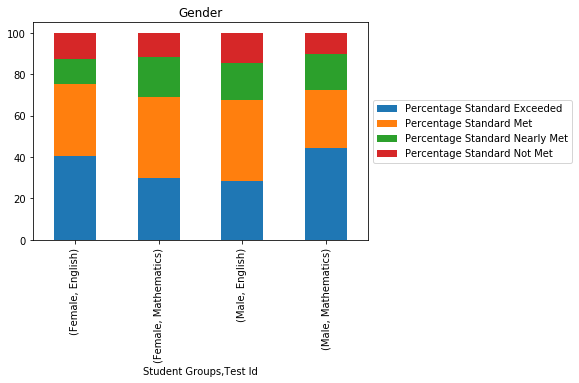

In [55]:
stackedbar(final_data_2, 'Gender')

**Ethnicity**

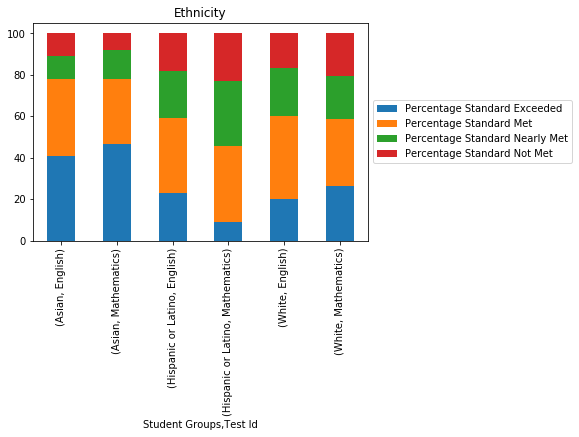

In [56]:
stackedbar(final_data_2, 'Ethnicity')

**English-Language Fluency**

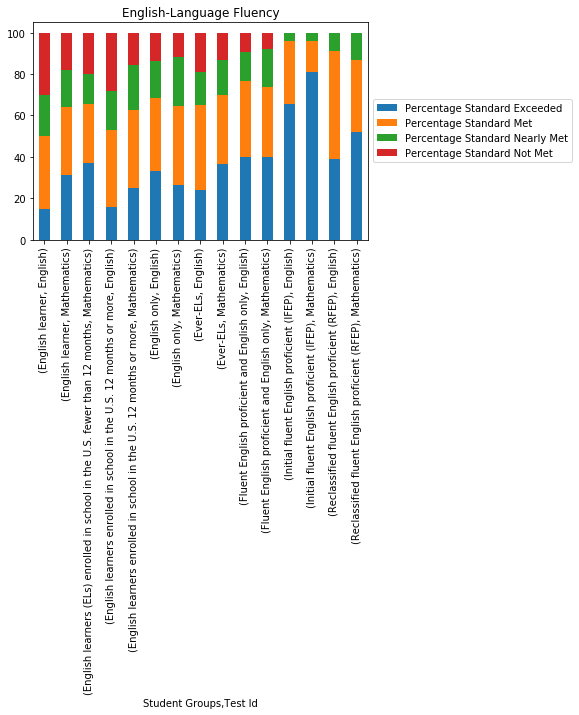

In [57]:
stackedbar(final_data_2, 'English-Language Fluency')

**Economic Status**

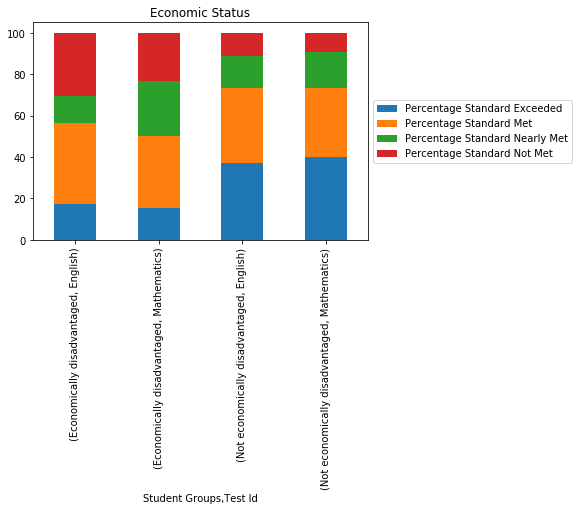

In [58]:
stackedbar(final_data_2, 'Economic Status')

**Disability Status**

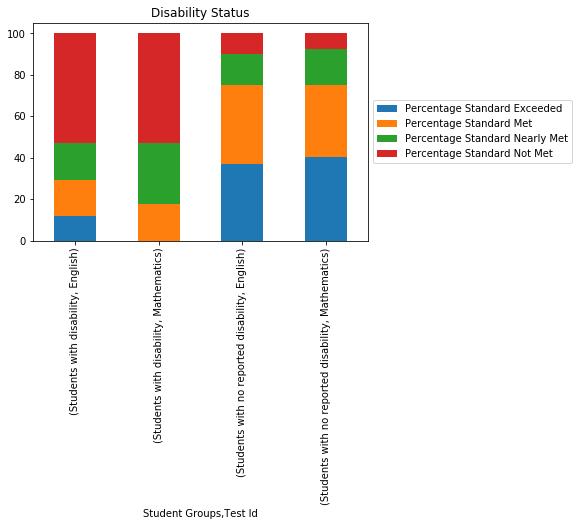

In [59]:
stackedbar(final_data_2, 'Disability Status')

In [60]:
#sns.set(style="whitegrid")
sns.set_style(style='ticks')
sns.set(rc={'figure.figsize':(10,8)})

In [61]:
def drawBarGraphForTestIdandCategory(df, category, testId, perfCol):
    df_local = df.loc[(df['Category'] == category) & (df['Test Id'] == testId)]
    ax = sns.barplot(x="School Name", y=perfCol, hue="Student Groups",  data=df_local, ci=None, n_boot=0)
    plt.xticks(rotation=45)
    plt.title(category +' | ' + testId + ' | ' + perfCol, size=24)

In [62]:
def drawBarGraphForTestIdandCategoryTwographs(df, category, testId1, testId2, perfCol):
    df_local1 = df.loc[(df['Category'] == category) & (df['Test Id'] == testId1)]
    df_local2 = df.loc[(df['Category'] == category) & (df['Test Id'] == testId2)]
    f, axes = plt.subplots(1, 2)
    
    sns.barplot(x="School Name", y=perfCol, hue="Student Groups",  data=df_local1, ax=axes[0], ci=None, n_boot=0)
    sns.barplot(x="School Name", y=perfCol, hue="Student Groups",  data=df_local2, ax=axes[1], ci=None, n_boot=0)
    
    f.suptitle(category, size=24)
    axes[0].set_title(testId1)
    axes[1].set_title(testId2)
    #plt.xticks(rotation=45)

In [63]:
def drawBarGraphForTestIdandCategoryFaceGrid(df, category, perfCol):
    df_local = df.loc[(df['Category'] == category)]
    #g = sns.FacetGrid(df_local, col="Test Id", hue="Student Groups")
    g = sns.FacetGrid(df_local, col="Student Groups", hue="Test Id")
    g.map(plt.scatter, "School Name", perfCol, alpha=.7)
    g.add_legend();

In [64]:
def drawBarGraphFaceGrid2(df, category, perfCol, mode):
    df_local = df.loc[(df['Category'] == category)]
    if mode=="Test Id":
        g = sns.FacetGrid(df_local, col="Test Id", row_order=perfCol)
        g.map(sns.barplot, "Student Groups", perfCol)
    elif mode=="Student Groups":
        g = sns.FacetGrid(df_local, col="Student Groups", row_order=perfCol)
        g.map(sns.barplot, "Test Id", perfCol)
    else:
        print("No perspertive is speficified. Please choose \"Test Id\" or \"Student Groups\".")
    g.add_legend();

In [65]:
def drawBarGraphFaceGrid2by2(df, category, perfCol, mode):
    df_local = df.loc[(df['Category'] == category)]
    if mode=="Test Id":
        g = sns.FacetGrid(df_local, col="Test Id", row_order=perfCol)
        g.map(sns.barplot, "Student Groups", perfCol)
    elif mode=="Student Groups":
        g = sns.FacetGrid(df_local, col="Student Groups", row_order=perfCol)
        g.map(sns.barplot, "Test Id", perfCol)
    else:
        print("No perspertive is speficified. Please choose \"Test Id\" or \"Student Groups\".")
    g.add_legend();

/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


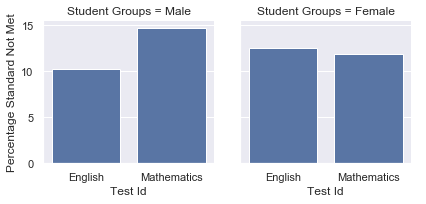

In [66]:
drawBarGraphFaceGrid2(final_data_2, 'Gender', 'Percentage Standard Not Met', 'Student Groups')

/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


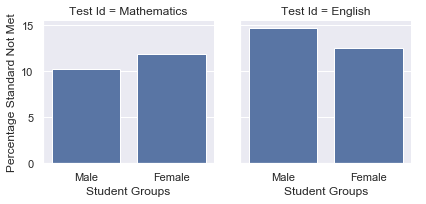

In [67]:
drawBarGraphFaceGrid2(final_data_2, 'Gender', 'Percentage Standard Not Met', 'Test Id')

/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


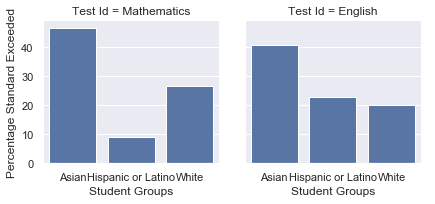

In [68]:
drawBarGraphFaceGrid2(final_data_2, 'Ethnicity', 'Percentage Standard Exceeded', 'Test Id')

/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


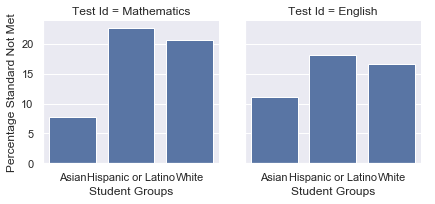

In [69]:
drawBarGraphFaceGrid2(final_data_2, 'Ethnicity', 'Percentage Standard Not Met', 'Test Id')

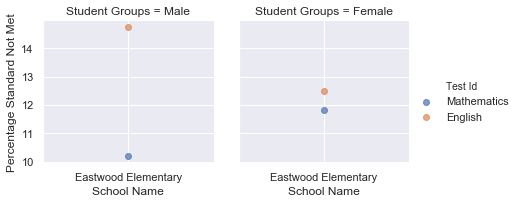

In [70]:
drawBarGraphForTestIdandCategoryFaceGrid(final_data_2, 'Gender', 'Percentage Standard Not Met')

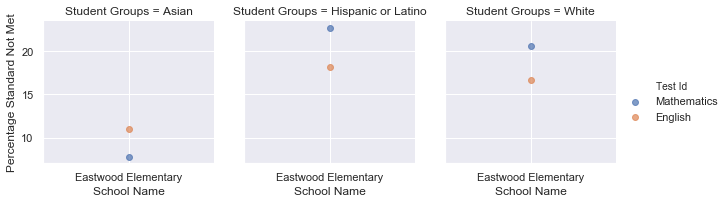

In [71]:
drawBarGraphForTestIdandCategoryFaceGrid(final_data_2, 'Ethnicity', 'Percentage Standard Not Met')

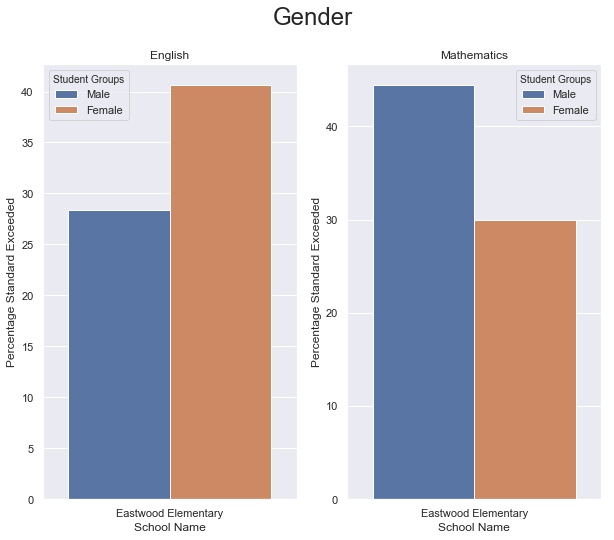

In [72]:
drawBarGraphForTestIdandCategoryTwographs(final_data_2, 'Gender', 'English', 'Mathematics', 'Percentage Standard Exceeded')

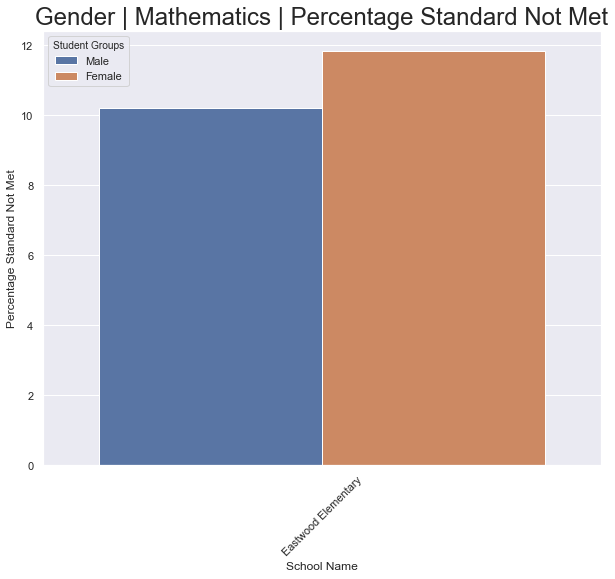

In [73]:
drawBarGraphForTestIdandCategory(final_data_2, 'Gender', 'Mathematics', 'Percentage Standard Not Met')

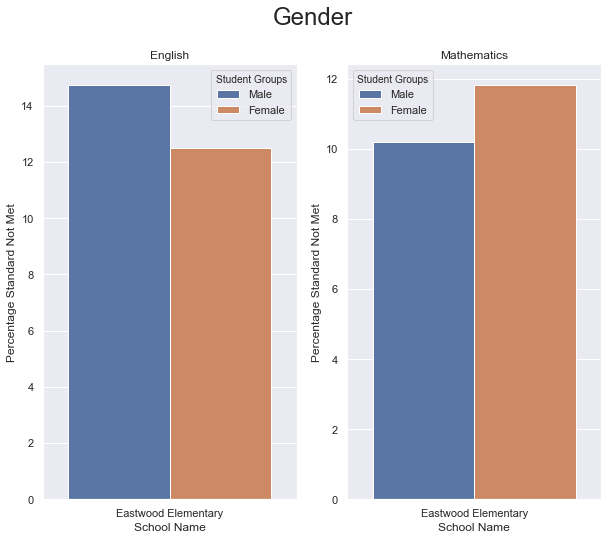

In [74]:
drawBarGraphForTestIdandCategoryTwographs(final_data_2, 'Gender', 'English', 'Mathematics', 'Percentage Standard Not Met')

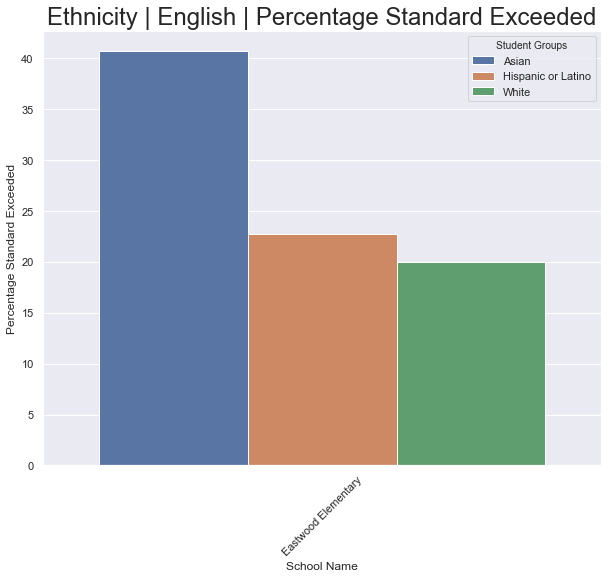

In [75]:
drawBarGraphForTestIdandCategory(final_data_2, 'Ethnicity', 'English', 'Percentage Standard Exceeded')

## Scatterplot (Correlation)

,Subgroup ID,County Code,District Code,Test Year,Zip Code,Percentage Standard Exceeded,Percentage Standard Met,Percentage Standard Nearly Met,Percentage Standard Not Met,Students with Scores,Area 1 Percentage Above Standard,Area 1 Percentage Near Standard,Area 1 Percentage Below Standard,Area 2 Percentage Above Standard,Area 2 Percentage Near Standard,Area 2 Percentage Below Standard,Area 3 Percentage Above Standard,Area 3 Percentage Near Standard,Area 3 Percentage Below Standard,Area 4 Percentage Above Standard,Area 4 Percentage Near Standard,Area 4 Percentage Below Standard,House_median
School Code,,,,,,,,,,,,,,,,,,,,,,,
135137,1,30,73650,2018,92620,35.855,35.07,16.765,12.31,204.5,45.095,38.21,16.7,40.34,43.78,15.885,29.605,57.69,12.705,18.325,24.345,7.33,927300.0


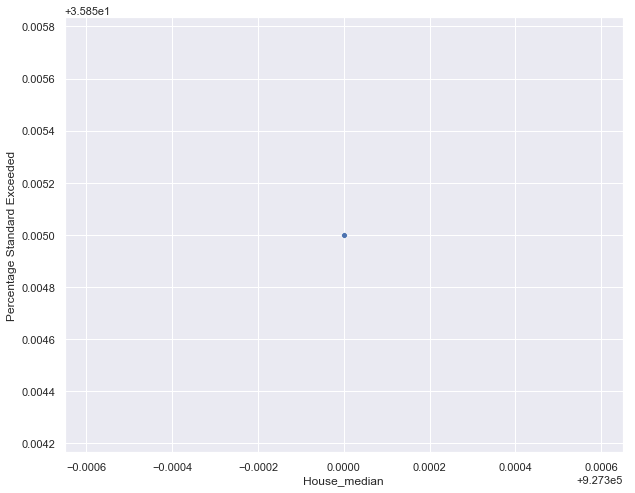

In [76]:
df_local = final_data_2.loc[(final_data_2['Student Groups'] == "All Students")].groupby('School Code').mean()
ax = sns.scatterplot(x="House_median", y='Percentage Standard Exceeded', data=df_local)
df_local

# To be deleted (Below)

In [77]:
#ive District Code with District Name from entities DataFrame

school_code_dict = {}

def make_code_dict(code, name):   
    if code not in school_code_dict.keys():
        school_code_dict[code] = name

code = entities.loc[(entities['District Name'] == 'Irvine Unified'), ['District Code']].iloc[0][0]
name = 'Irvine Unified'

#make the input parameter dataframe (Series of school names and get the codes)
make_code_dict(code, name)

print(school_code_dict)

{73650: 'Irvine Unified'}


In [78]:
df.loc[(df['District Code'] == 73650) & (df['Subgroup ID'] == 76) & (df['Grade'] == 3), :]

,County Code,District Code,School Code,Test Year,Subgroup ID,Test Type,Grade,Test Id,Percentage Standard Exceeded,Percentage Standard Met,Percentage Standard Nearly Met,Percentage Standard Not Met,Students with Scores,Area 1 Percentage Above Standard,Area 1 Percentage Near Standard,Area 1 Percentage Below Standard,Area 2 Percentage Above Standard,Area 2 Percentage Near Standard,Area 2 Percentage Below Standard,Area 3 Percentage Above Standard,Area 3 Percentage Near Standard,Area 3 Percentage Below Standard,Area 4 Percentage Above Standard,Area 4 Percentage Near Standard,Area 4 Percentage Below Standard
1602961,30,73650,0,2018,76,B,3,Mathematics,58.03,29.65,8.98,3.34,1258.0,73.85,21.54,4.61,62.32,32.03,5.64,66.38,28.30,5.33,0.00,0.00,0.00
1602962,30,73650,0,2018,76,B,3,English,60.20,21.14,11.81,6.85,1211.0,55.08,36.09,8.84,54.38,35.62,10.00,41.29,53.76,4.95,56.81,35.84,7.35
1603803,30,73650,129155,2018,76,B,3,Mathematics,74.12,18.82,2.35,4.71,85.0,85.88,9.41,4.71,71.76,23.53,4.71,82.35,14.12,3.53,0.00,0.00,0.00
1603804,30,73650,129155,2018,76,B,3,English,75.00,16.67,3.57,4.76,84.0,54.76,39.29,5.95,76.19,16.67,7.14,53.57,42.86,3.57,75.00,20.24,4.76
1604137,30,73650,129296,2018,76,B,3,Mathematics,61.97,29.58,7.04,1.41,71.0,77.46,19.72,2.82,60.56,38.03,1.41,70.42,28.17,1.41,0.00,0.00,0.00
1604138,30,73650,129296,2018,76,B,3,English,60.56,21.13,11.27,7.04,71.0,54.93,40.85,4.23,49.30,38.03,12.68,43.66,50.70,5.63,61.97,30.99,7.04
1604465,30,73650,133389,2018,76,B,3,Mathematics,50.00,32.81,12.50,4.69,64.0,68.75,25.00,6.25,53.13,39.06,7.81,54.69,39.06,6.25,0.00,0.00,0.00
1604466,30,73650,133389,2018,76,B,3,English,52.38,22.22,12.70,12.70,63.0,47.62,38.10,14.29,42.86,41.27,15.87,31.75,58.73,9.52,42.86,44.44,12.70
1604845,30,73650,135137,2018,76,B,3,Mathematics,44.74,36.84,13.16,5.26,38.0,57.89,34.21,7.89,65.79,23.68,10.53,52.63,44.74,2.63,0.00,0.00,0.00
1604846,30,73650,135137,2018,76,B,3,English,50.00,33.33,8.33,8.33,36.0,47.22,41.67,11.11,52.78,36.11,11.11,22.22,75.00,2.78,52.78,33.33,13.89


**Hypothesis**

- The schools with many Asian students tend to achieve high scores.
- The schools with high-income families tend to achieve high scores.
- The schools with highly educated parents tend to achieve high scores.
- The schools surrounded by high house costs tend to achieve high scores.


***Todo***

Longitude, latitude information to visualize the scores on the map

In [79]:
#%lsmagic